In [285]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [286]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
clinical_data=pd.read_csv("/content/drive/MyDrive/new2.XLSX")

print(clinical_data)

     Case ID Patient affiliation  Age at Histological Diagnosis  \
0    R01-035                  VA                             78   
1    AMC-011            Stanford                             66   
2    AMC-005            Stanford                             76   
3    R01-141            Stanford                             79   
4    R01-024                  VA                             52   
..       ...                 ...                            ...   
102  R01-026            Stanford                             59   
103  AMC-015            Stanford                             58   
104  R01-109                  VA                             69   
105  R01-003                  VA                             65   
106  R01-148            Stanford                             43   

      Weight (lbs)  Gender                 Ethnicity Smoking status  \
0           216.09    Male                 Caucasian        Current   
1    Not Collected  Female  Not Recorded In Database 

In [287]:
#features in the dataset
clinical_data.columns

Index(['Case ID', 'Patient affiliation', 'Age at Histological Diagnosis',
       'Weight (lbs)', 'Gender', 'Ethnicity', 'Smoking status', 'Pack Years',
       'Quit Smoking Year', '%GG', 'Tumor Location (choice=RUL)',
       'Tumor Location (choice=RML)', 'Tumor Location (choice=RLL)',
       'Tumor Location (choice=LUL)', 'Tumor Location (choice=LLL)',
       'Tumor Location (choice=L Lingula)', 'Tumor Location (choice=Unknown)',
       'Histology ', 'Pathological T stage', 'Pathological N stage',
       'Pathological M stage', 'Histopathological Grade',
       'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Date of Recurrence',
       'Date of Last Known Alive', 'Survival Status', 'Date of Death',
       'Time to Death (days)', 'CT Date', 'Days between CT and sur

In [288]:
#no of rows in the dataset
clinical_data.index

RangeIndex(start=0, stop=107, step=1)

In [289]:
#information about each feature
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Case ID                                            107 non-null    object 
 1   Patient affiliation                                107 non-null    object 
 2   Age at Histological Diagnosis                      107 non-null    int64  
 3   Weight (lbs)                                       107 non-null    object 
 4   Gender                                             107 non-null    object 
 5   Ethnicity                                          107 non-null    object 
 6   Smoking status                                     107 non-null    object 
 7   Pack Years                                         68 non-null     object 
 8   Quit Smoking Year                                  51 non-null     float64
 9   %GG       

In [290]:
clinical_data["Smoking status"].value_counts()

,count
Smoking status,
Former,55
Nonsmoker,39
Current,13


In [291]:

clinical_data["Gender"].value_counts()


,count
Gender,
Male,56
Female,51


In [292]:
clinical_data["Recurrence"].value_counts()

,count
Recurrence,
yes,54
no,52
Not collected,1


In [293]:
clinical_data["Survival Status"].value_counts()

,count
Survival Status,
Alive,71
Dead,36


In [294]:
#replacing Not checked with No
clinical_data["Recurrence"]=clinical_data["Recurrence"].replace("Not collected","no")
clinical_data["Recurrence"].value_counts()

,count
Recurrence,
yes,54
no,53


In [295]:
clinical_data["Radiation"].value_counts()
#replacing Not checked with No
clinical_data["Radiation"]=clinical_data["Radiation"].replace("Not Collected","No")
clinical_data["Radiation"].value_counts()

,count
Radiation,
No,94
Yes,13


In [296]:
clinical_data["Chemotherapy"].value_counts()
#replacing Not checked with No
clinical_data["Chemotherapy"]=clinical_data["Chemotherapy"].replace("Not Collected","No")
clinical_data["Chemotherapy"].value_counts()

,count
Chemotherapy,
No,80
Yes,27


In [297]:
#EGFR mutation status
clinical_data["EGFR mutation status"].value_counts()
#replacing Not checked with No
clinical_data["EGFR mutation status"]=clinical_data["EGFR mutation status"].replace("Not collected","Wildtype")
clinical_data["EGFR mutation status"]=clinical_data["EGFR mutation status"].replace("Unknown","Wildtype")
clinical_data["EGFR mutation status"].value_counts()



,count
EGFR mutation status,
Wildtype,80
Mutant,27


In [298]:
'''#KRAS mutation status
clinical_data["KRAS mutation status"].value_counts()
#replacing Not checked with No
clinical_data["KRAS mutation status"]=clinical_data["KRAS mutation status"].replace("Not collected","Wildtype")
clinical_data["KRAS mutation status"]=clinical_data["KRAS mutation status"].replace("Unknown","Wildtype")
clinical_data["KRAS mutation status"].value_counts()'''



'#KRAS mutation status\nclinical_data["KRAS mutation status"].value_counts()\n#replacing Not checked with No\nclinical_data["KRAS mutation status"]=clinical_data["KRAS mutation status"].replace("Not collected","Wildtype")\nclinical_data["KRAS mutation status"]=clinical_data["KRAS mutation status"].replace("Unknown","Wildtype")\nclinical_data["KRAS mutation status"].value_counts()'

In [299]:
#ALK translocation status
clinical_data["ALK translocation status"].value_counts()
#replacing Not checked with No
clinical_data["ALK translocation status"]=clinical_data["ALK translocation status"].replace("Not collected","Wildtype")
clinical_data["ALK translocation status"]=clinical_data["ALK translocation status"].replace("Unknown","Wildtype")
clinical_data["ALK translocation status"].value_counts()

,count
ALK translocation status,
Wildtype,106
Translocated,1


In [300]:
#Histology
clinical_data["Histology "].value_counts()
clinical_data["Histology "]=clinical_data["Histology "].replace("NSCLC NOS (not otherwise specified)","Adenocarcinoma")
clinical_data["Histology "].value_counts()


,count
Histology,
Adenocarcinoma,99
Squamous cell carcinoma,8


In [301]:
# Data Preprocessing

#Smoking Status
# Define the mapping
smoking_status_mapping = {'Nonsmoker': 0, 'Former': 1, 'Current': 2}

# Apply the mapping to the 'Smoking status' column
clinical_data['Smoking status'] = clinical_data['Smoking status'].map(smoking_status_mapping)

#Recurrence
# label_encoder object knows

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Recurrence']= label_encoder.fit_transform(clinical_data['Recurrence'])

#Raditaion
# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Radiation']= label_encoder.fit_transform(clinical_data['Radiation'])

#Gender
# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Gender']= label_encoder.fit_transform(clinical_data['Gender'])

#survival status
# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Survival Status']= label_encoder.fit_transform(clinical_data['Survival Status'])

#chemotherapy
# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Chemotherapy']= label_encoder.fit_transform(clinical_data['Chemotherapy'])

#Histology
# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Histology ']= label_encoder.fit_transform(clinical_data['Histology '])


In [302]:
clinical_data

,Case ID,Patient affiliation,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,Quit Smoking Year,%GG,...,Recurrence,Recurrence Location,Date of Recurrence,Date of Last Known Alive,Survival Status,Date of Death,Time to Death (days),CT Date,Days between CT and surgery,PET Date
0,R01-035,VA,78,216.09,1,Caucasian,2,90,NaN,0%,...,1,local,9/9/1993,9/5/1997,1,10/1/1997,1798.0,9/17/1992,16,9/23/1992
1,AMC-011,Stanford,66,Not Collected,0,Not Recorded In Database,1,16,1963.0,Not Assessed,...,1,distant,3/17/1994,1/11/1997,0,NaN,NaN,10/16/1992,29,Not Collected
2,AMC-005,Stanford,76,Not Collected,1,Not Recorded In Database,1,30,1962.0,Not Assessed,...,1,distant,1/4/1996,1/7/1997,0,NaN,NaN,7/21/1994,2,Not Collected
3,R01-141,Stanford,79,155,1,Hispanic/Latino,1,5,1962.0,>0 - 25%,...,1,distant,4/22/1999,7/30/1999,0,NaN,NaN,2/28/1996,87,5/11/1996
4,R01-024,VA,52,169,1,Caucasian,2,53,NaN,0%,...,1,distant,5/15/1992,8/10/1992,1,8/10/1992,366.0,3/8/1991,155,3/23/1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,R01-026,Stanford,59,158,1,Asian,0,NaN,NaN,0%,...,1,distant,4/10/1991,6/17/1997,1,6/17/1997,2356.0,11/13/1990,52,11/28/1990
103,AMC-015,Stanford,58,Not Collected,1,Not Recorded In Database,1,45,1974.0,Not Assessed,...,0,NaN,NaN,7/13/1995,0,NaN,NaN,2/5/1992,51,Not Collected
104,R01-109,VA,69,194,1,Caucasian,1,50,1994.0,>0 - 25%,...,1,regional,8/22/1996,8/13/1999,0,NaN,NaN,7/30/1994,56,8/2/1994
105,R01-003,VA,65,Not Collected,1,Caucasian,2,38,NaN,0%,...,0,NaN,NaN,10/6/1993,0,NaN,NaN,12/10/1991,25,12/19/1991


In [303]:
#one hot encoding
one_hot_encoded_data = pd.get_dummies(clinical_data, columns = ['EGFR mutation status','KRAS mutation status','ALK translocation status'])
print(one_hot_encoded_data.head(2))
one_hot_encoded_data.columns

X_data=one_hot_encoded_data.loc[:,['Age at Histological Diagnosis','Gender','Smoking status','Histology ','EGFR mutation status_Mutant', 'EGFR mutation status_Wildtype','KRAS mutation status_Mutant', 'KRAS mutation status_Wildtype',
       'ALK translocation status_Translocated',
       'ALK translocation status_Wildtype','Chemotherapy', 'Radiation', 'Survival Status']]
Y_label=one_hot_encoded_data.loc[:,["Recurrence"]]

   Case ID Patient affiliation  Age at Histological Diagnosis   Weight (lbs)  \
0  R01-035                  VA                             78         216.09   
1  AMC-011            Stanford                             66  Not Collected   

   Gender                 Ethnicity  Smoking status Pack Years  \
0       1                 Caucasian               2         90   
1       0  Not Recorded In Database               1         16   

   Quit Smoking Year           %GG  ... Days between CT and surgery  \
0                NaN            0%  ...                          16   
1             1963.0  Not Assessed  ...                          29   

        PET Date EGFR mutation status_Mutant EGFR mutation status_Wildtype  \
0      9/23/1992                       False                          True   
1  Not Collected                       False                          True   

  KRAS mutation status_Mutant KRAS mutation status_Not collected  \
0                       False              

In [304]:
#splitting dataset into train and test
xtrain,xtest,ytrain,ytest=train_test_split(X_data,Y_label,test_size=0.2)
ytrain = ytrain[:83]
ytest = ytest[:19]
xtrain.shape
xtest.shape
ytrain.shape
ytest.shape
print(xtrain.shape)
print(ytrain.shape)


(85, 13)
(83, 1)


In [305]:
# Core libraries
import numpy as np
import pandas as pd

# Sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# XGBoost
import xgboost as xgb

# Optional: For feature importance plot
import matplotlib.pyplot as plt


In [306]:
from sklearn.model_selection import train_test_split

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(X_data, Y_label, test_size=0.2, random_state=42)

# Check shapes
print("xtrain:", xtrain.shape)
print("ytrain:", ytrain.shape)
print("xtest:", xtest.shape)
print("ytest:", ytest.shape)


xtrain: (85, 13)
ytrain: (85, 1)
xtest: (22, 13)
ytest: (22, 1)


In [307]:
xgb_model.fit(xtrain, ytrain)  # No slicing needed


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:15:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [308]:
# Predict labels on test set
y_pred = xgb_model.predict(xtest)


In [309]:
# Accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(ytest, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.5455
Confusion Matrix:
[[7 3]
 [7 5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       0.62      0.42      0.50        12

    accuracy                           0.55        22
   macro avg       0.56      0.56      0.54        22
weighted avg       0.57      0.55      0.54        22



Optimising Xgboost model


In [310]:
# Ensure labels are 1D
ytrain = ytrain.values.ravel()
ytest = ytest.values.ravel()


In [317]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_data, Y_label, test_size=0.2, random_state=45, stratify=Y_label
)


[0]	train-logloss:0.67923	eval-logloss:0.68667
[1]	train-logloss:0.66763	eval-logloss:0.67708
[2]	train-logloss:0.65805	eval-logloss:0.67048
[3]	train-logloss:0.64703	eval-logloss:0.66018
[4]	train-logloss:0.63738	eval-logloss:0.65390
[5]	train-logloss:0.62778	eval-logloss:0.64509
[6]	train-logloss:0.61758	eval-logloss:0.64298
[7]	train-logloss:0.60883	eval-logloss:0.63135
[8]	train-logloss:0.60210	eval-logloss:0.62726
[9]	train-logloss:0.59435	eval-logloss:0.61824
[10]	train-logloss:0.58621	eval-logloss:0.60985
[11]	train-logloss:0.57913	eval-logloss:0.60124
[12]	train-logloss:0.57297	eval-logloss:0.59242
[13]	train-logloss:0.56701	eval-logloss:0.58364
[14]	train-logloss:0.55998	eval-logloss:0.57574
[15]	train-logloss:0.55133	eval-logloss:0.56931
[16]	train-logloss:0.54528	eval-logloss:0.56499
[17]	train-logloss:0.53968	eval-logloss:0.56037
[18]	train-logloss:0.53339	eval-logloss:0.55302
[19]	train-logloss:0.52741	eval-logloss:0.54763
[20]	train-logloss:0.52270	eval-logloss:0.54426
[2

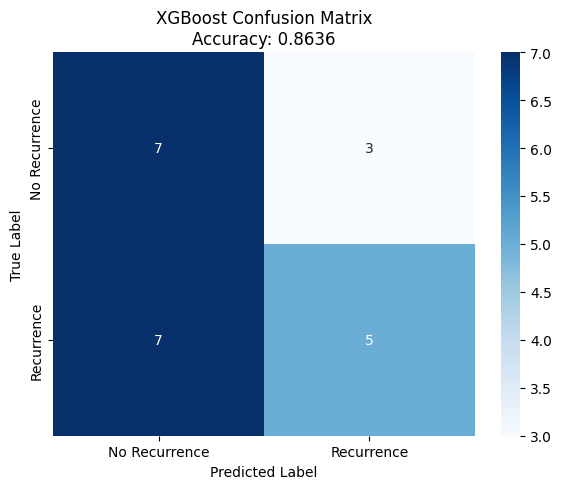

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.79      1.00      0.88        11

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.86        22
weighted avg       0.89      0.86      0.86        22



In [320]:
# Step 1: Convert datasets to DMatrix (XGBoost's internal data structure)
dtrain = xgb.DMatrix(xtrain, label=ytrain)
dtest = xgb.DMatrix(xtest, label=ytest)

# Step 2: Set parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'eta': 0.05,           # learning rate
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'logloss'
}

# Step 3: Train with early stopping
evallist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evallist,
    early_stopping_rounds=20,
    verbose_eval=True
)

# Step 4: Make predictions
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 5: Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(ytest, y_pred))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Recurrence', 'Recurrence'],
    yticklabels=['No Recurrence', 'Recurrence']
)

plt.title(f'XGBoost Confusion Matrix\nAccuracy: {accuracy_score(ytest, y_pred):.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
#print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))


<Figure size 1000x600 with 0 Axes>

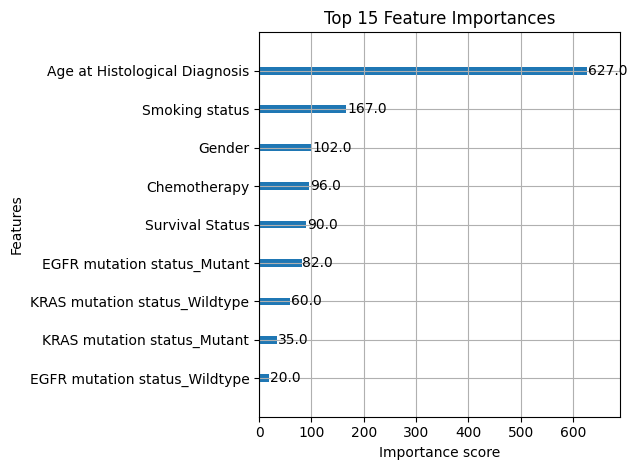

In [319]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Create a new figure with the desired size
plt.figure(figsize=(10, 6))

# Plot top 15 important features
xgb.plot_importance(
    bst,                      # your trained XGBoost model
    max_num_features=15,      # top 15
    importance_type='weight'  # or 'gain', 'cover' based on what you want
)

# Add title and show the plot
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()


In [321]:
import joblib

# Get the best model
best_model = random_search.best_estimator_

# Save the model
joblib.dump(best_model, "xgboost_best_model.pkl")

print("✅ Model saved as 'xgboost_best_model.pkl'")


✅ Model saved as 'xgboost_best_model.pkl'


In [322]:
'''import joblib

# Load the saved model
loaded_model = joblib.load("xgboost_best_model.pkl")

# Verify by predicting
y_pred = loaded_model.predict(xtest_scaled)
print("✅ Model loaded successfully and ready to use!")
'''

'import joblib\n\n# Load the saved model\nloaded_model = joblib.load("xgboost_best_model.pkl")\n\n# Verify by predicting\ny_pred = loaded_model.predict(xtest_scaled)\nprint("✅ Model loaded successfully and ready to use!")\n'